# A Brief Introduction to Community Detection Methods

## Description
Real-world networks reveal clustering behaviour, which is exhibited in the formation of communities/clusters/partitions (terms are used interchangeably in this notebook) in the graph structure. When studying networks, their structure and function, it is crucial to identify these bunchings. In this recipe, we explore graph structure with a strong focus on community detection. 

**Requirements:**

Install [community API](https://python-louvain.readthedocs.io/en/latest/api.html)
```
pip install python-louvain -i https://pypi.tuna.tsinghua.edu.cn/simple 
````
-   This package implements community detection
-   Package name is community but refer to python-louvain on pypi

In [1]:
## For Network Analysis and Visualization
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

## For Community Detection (Louvain Method)
import community

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## 1. Load the Network
Here, we use the Zachary's karate club network $K$ to illustrate some concepts on network structures. This network was first presented in [1].

[1] W. W. Zachary, An information flow model for conflict and fission in small groups, Journal of Anthropological Research 33, 452-473 (1977).

In [2]:
K = nx.karate_club_graph()

## 2. Network Structure

In [3]:
print ("Number of nodes: ", K.number_of_nodes())
print ("Number of edges: ", K.number_of_edges())

Number of nodes:  34
Number of edges:  78


In [4]:
pos = nx.spring_layout(K)

In [5]:
print(pos) # 坐标

{0: array([-0.3099165 ,  0.22193352]), 1: array([-0.08491146,  0.25090151]), 2: array([-0.00633655,  0.08530219]), 3: array([-0.1901602 ,  0.35300238]), 4: array([-0.61384702,  0.25610397]), 5: array([-0.75504416,  0.20842188]), 6: array([-0.72119501,  0.11537513]), 7: array([-0.07427741,  0.35568781]), 8: array([ 0.11367153, -0.02354819]), 9: array([0.45663838, 0.15736177]), 10: array([-0.72262518,  0.3618347 ]), 11: array([-0.56893907,  0.49343444]), 12: array([-0.28558885,  0.6627575 ]), 13: array([-0.08065359,  0.0944751 ]), 14: array([ 0.5931116 , -0.33184186]), 15: array([ 0.5378277 , -0.14530104]), 16: array([-1.        ,  0.13146422]), 17: array([-0.39862363,  0.53490171]), 18: array([ 0.70314271, -0.06319184]), 19: array([0.08738719, 0.29708185]), 20: array([ 0.70662285, -0.2633421 ]), 21: array([-0.15293807,  0.55888926]), 22: array([ 0.39232747, -0.51743145]), 23: array([ 0.26041366, -0.42680811]), 24: array([-0.05600421, -0.60727996]), 25: array([ 0.07141126, -0.5208386 ]),

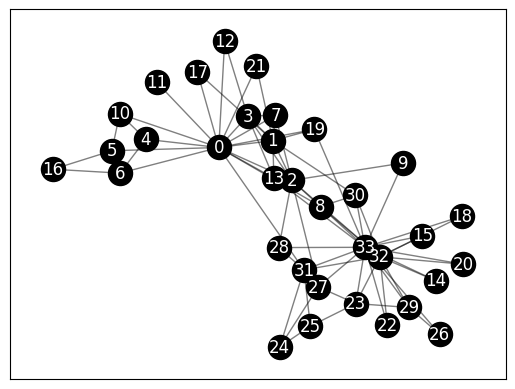

In [6]:
nx.draw_networkx_nodes(K, pos, node_size=300, node_color="black")
nx.draw_networkx_edges(K, pos, alpha=0.500)
nx.draw_networkx_labels(K, pos, font_color="white")
plt.show()

### Real-world partition

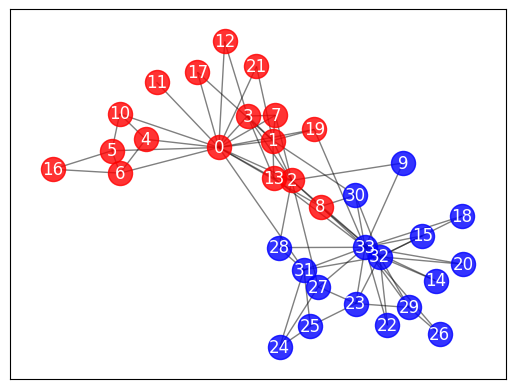

In [11]:
mrhi = [0,1,2,3,4,5,6,7,8,10,11,12,13,16,17,19,21]
johna = [9,14,15,18,20,22,23,24,25,26,27,28,29,30,31,32,33]

nx.draw_networkx_nodes(K,pos,
                       nodelist=mrhi,
                       node_color='r',
                       node_size=300,
                       alpha=0.8)
nx.draw_networkx_nodes(K,pos,
                       nodelist=johna,
                       node_color='b',
                       node_size=300,
                       alpha=0.8)
nx.draw_networkx_edges(K, pos, alpha=0.5)
nx.draw_networkx_labels(K, pos, font_color="white")
plt.show()

## 3. Modularity-Based Community Detection: The Louvain Method

The **community detection algorithm** that we implement in this notebook is a **modularity**-based algorithm. The **modularity** $Q$ quantifies how well a network is partitioned into communities. The higher the network modularity is, the more optimal the partitionioning.

In this recipe, we implement a modularity-maximization algorithm called the Louvain algorithm.

<img src="louvain.png" width="50%">

 We go back to Zachary's karate club and find the best partitions.

In [7]:
partition = community.best_partition(K)

In [8]:
partition

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 1,
 5: 1,
 6: 1,
 7: 0,
 8: 3,
 9: 3,
 10: 1,
 11: 0,
 12: 0,
 13: 0,
 14: 3,
 15: 3,
 16: 1,
 17: 0,
 18: 3,
 19: 0,
 20: 3,
 21: 0,
 22: 3,
 23: 2,
 24: 2,
 25: 2,
 26: 3,
 27: 2,
 28: 2,
 29: 3,
 30: 3,
 31: 2,
 32: 3,
 33: 3}

Now, let's redraw the network; this time, highlighting the different communities by node color.

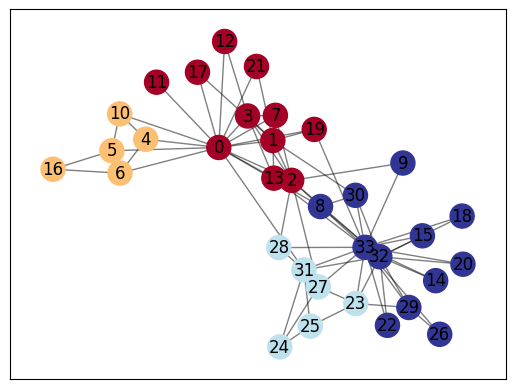

In [9]:
nx.draw_networkx_nodes(K, pos, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(K, pos, alpha=0.5)
nx.draw_networkx_labels(K, pos)
plt.show()

The algorithm produces four (4) partitions. Let's compare this partition to the actual.

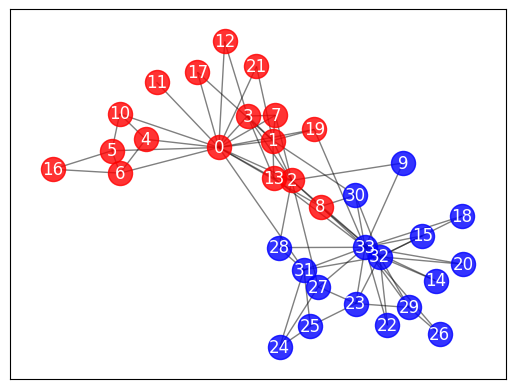

In [12]:
nx.draw_networkx_nodes(K,pos, nodelist=mrhi, node_color='r',
                       node_size=300, alpha=0.8)
nx.draw_networkx_nodes(K,pos, nodelist=johna, node_color='b', 
                       node_size=300, alpha=0.8)
nx.draw_networkx_edges(K, pos, alpha=0.5)
nx.draw_networkx_labels(K, pos, font_color="white")
plt.show()

## 4. More Real-World Networks

### Sample 1: Celegans Metabolic Network

In [13]:
df = pd.read_csv("celegans_metabolic.csv")
G = nx.from_pandas_edgelist(df, 'source', 'target', create_using=nx.Graph())

In [14]:
G.number_of_nodes(), G.number_of_edges()

(453, 2040)

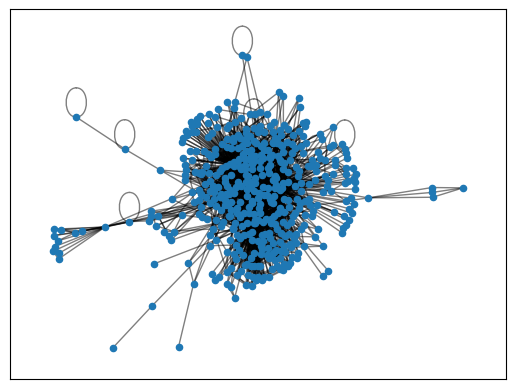

In [19]:
# TODO: Visualize the celegans metabolic network 
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.500)
# nx.draw_networkx_labels(G, pos)
plt.show()

#### Finding Communities

In [23]:
# TODO: Find communities in celegans metabolic network
partition = community.best_partition(G)

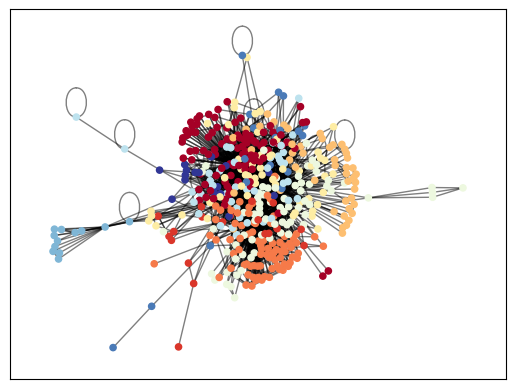

In [24]:
# TODO: Visualize the communities in celegans metabolic network 
nx.draw_networkx_nodes(G, pos, cmap=plt.cm.RdYlBu,
                       node_color=list(partition.values()), node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.5)
# nx.draw_networkx_labels(G, pos)
plt.show()

### Sample 2: Political Blogs

Here, we use the dataset utilized in the paper titled "The political blogosphere and the 2004 US Election" by L. A. Adamic and N. Glance (2005). It's a directed network of hyperlinks between weblogs on US politics.

In [25]:
P = nx.read_gml("polblogs.gml")

In [26]:
P.number_of_nodes(), P.number_of_edges()

(1490, 19090)

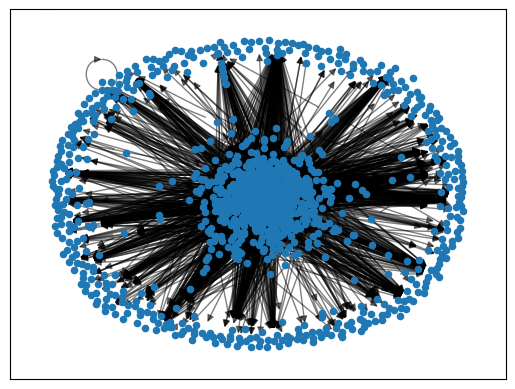

In [27]:
# TODO: Visualize the political blogs network 
pos = nx.spring_layout(P)
nx.draw_networkx_nodes(P, pos, node_size=20)
nx.draw_networkx_edges(P, pos, alpha=0.500)
# nx.draw_networkx_labels(P, pos)
plt.show()

#### Finding Communities
To perform the community detection algorithm, the **directed graph** needs to be made into an **undirected** one.

In [28]:
PR = P.to_undirected()
PR = nx.Graph(PR)

In [29]:
mypalette = ['blue', 'red', 'green', 'yellow', 'orange', 'violet'] + 5 * ['grey']

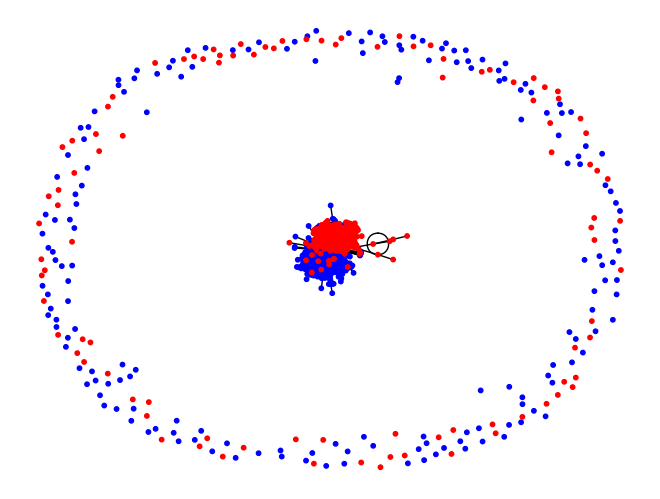

In [30]:
colors = [mypalette[PR.nodes()[i]['value']] for i in PR.nodes()]

pos = nx.spring_layout(PR)
nx.draw(PR, pos, node_color=colors, node_size=10)
plt.show()

##### Extract Giant Component

In [31]:
GC_nodes = max(nx.connected_components(PR), key=len)
GC = PR.subgraph(GC_nodes).copy()

In [38]:
# TODO: Find communities in celegans metabolic network
pos = nx.spring_layout(GC)
partition = community.best_partition(GC)

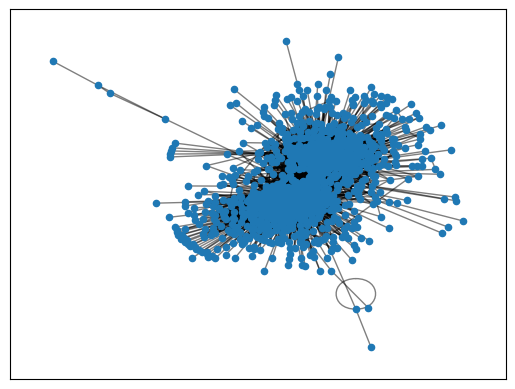

In [39]:
nx.draw_networkx_nodes(GC, pos, node_size=20)
nx.draw_networkx_edges(GC, pos, alpha=0.5)
# nx.draw_networkx_labels(GC, pos)
plt.show()

In [40]:
mypalette = ['blue', 'green', 'red', 'yellow', 'orange', 'violet'] + 5 * ['grey']

for k, v in partition.items():
    GC.nodes()[k]["louvain-val"] = v
colors = [mypalette[GC.nodes()[node]["louvain-val"]] for node in GC.nodes()]

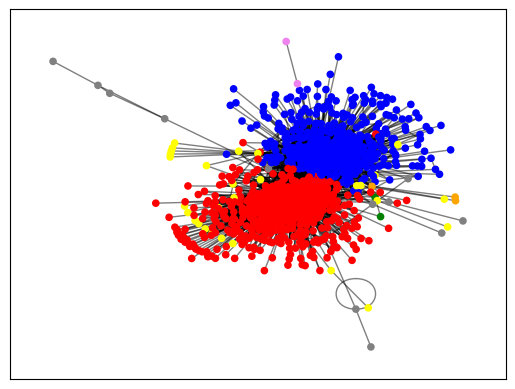

In [42]:
# TODO: Visualize the communities in political blogs network 

nx.draw_networkx_nodes(GC, 
                       pos, 
                       node_color=colors, 
                       node_size=20)
nx.draw_networkx_edges(GC, pos, alpha=0.5)
# nx.draw_networkx_labels(GC, pos)
plt.show()

## Relevant References

* **Network Science** by Albert-László Barabási (2015)
* **Social Network Analysis for Startups: Finding connections on the social web** by Maksim Tsvetovat and  Alexander Kouznetsov (2011)
* **Practical Data Science Cookbook** by Tony Ojeda et al. (2014)


## Some Network Data Repositories

* [The UCI Network Data Repository](http://deim.urv.cat/~alexandre.arenas/data/welcome.htm)
* [CCNR Network Databases](http://www3.nd.edu/~networks/resources.htm)
* [Alex Arenas Website](http://deim.urv.cat/~alexandre.arenas/data/welcome.htm)
* [Stanford Large Network Dataset Collection](http://snap.stanford.edu/data/)